In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import animation, rc
from IPython.display import HTML

MovieWriter imagemagick unavailable; using Pillow instead.


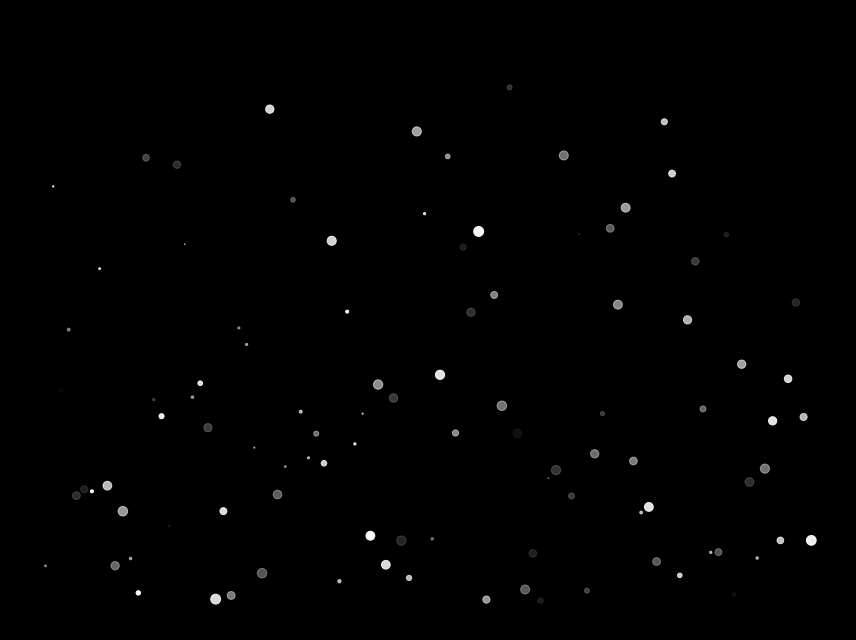

In [3]:
fig,ax = plt.subplots(figsize=(12, 9))
ax.axis('off')
fig.set_facecolor('black')

iters = 100
x = np.linspace(0, 1, 100)
y = np.random.rand(100)

speed = np.random.rand(100) / 40 + 0.01
size = np.random.rand(100) * 100
alpha = np.random.rand(100)


ims = []
for i in range(iters):
    y -= speed
    y[y < 0] = np.random.rand(len(y[y < 0]))
    im = ax.scatter(x, y,color='white', s=size, alpha=alpha,  animated=True)
    ims.append([im])

fig.tight_layout()
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

ani.save('snow_effect.gif', writer='imagemagick')
HTML(ani.to_jshtml())

In [11]:
%%capture
import seaborn as sns
rc('animation', html='jshtml')
np.random.seed(0)

fig,ax = plt.subplots(figsize=(12, 9))
ax.axis('off')

nums = 10
iters = 160
x, y = 0, 0
v_x, v_y = 1, 3
a_x, a_y = 0, 0.2
x_list, y_list = [x for _ in range(nums)], [y for _ in range(nums)]
size = np.arange(0, 1000, 1000/nums)
alpha = np.linspace(0, 1, nums)
color = sns.color_palette("RdPu", nums)

ims = []
v_ystart = v_y
for i in range(iters):
    im = ax.scatter(x_list, y_list,color=color, s=size, alpha=alpha,  animated=True)
    ims.append([im])
    v_y -= a_y
    x += v_x
    y += v_y
    if y < 0:
        y = 0
        v_y = v_ystart * 0.8
        v_ystart = v_y

    x_list.append(x)
    y_list.append(y)
    x_list = x_list[1:]
    y_list = y_list[1:]

fig.tight_layout()
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('bounce_ball.gif', writer='imagemagick')

In [12]:
HTML(ani.to_jshtml())